In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv(r"C:\Users\DELL\Downloads\marketing_lasso.csv",encoding='latin1')

# Features and target
X = data[["TV_spend", "radio_spend", "social_media_spend",
          "newspaper_spend", "billboard_spend",
          "influencer_spend", "email_spend"]]
y = data["sales_k"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# OLS
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
ols_coefs = pd.Series(ols.coef_, index=X.columns)

# Lasso
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)

# Identify important channels (non-zero coefficients)
important_channels = lasso_coefs[lasso_coefs != 0].index.tolist()

print("OLS coefficients:\n", ols_coefs, "\n")
print("Lasso coefficients:\n", lasso_coefs, "\n")
print("Important marketing channels (kept by Lasso):", important_channels)

# Interpretability comparison
print("\nInterpretability:")
print("OLS:assigns a coefficient to every channel, even weak ones")
print("Lasso:shrinks weak channels toward zero, keeping only the most impactful")



OLS coefficients:
 TV_spend              3.067339
radio_spend           3.123842
social_media_spend    4.497009
newspaper_spend      -0.303235
billboard_spend       0.705062
influencer_spend      6.436364
email_spend           0.246480
dtype: float64 

Lasso coefficients:
 TV_spend              2.969887
radio_spend           3.021990
social_media_spend    4.391036
newspaper_spend      -0.214264
billboard_spend       0.652891
influencer_spend      6.334476
email_spend           0.144501
dtype: float64 

Important marketing channels (kept by Lasso): ['TV_spend', 'radio_spend', 'social_media_spend', 'newspaper_spend', 'billboard_spend', 'influencer_spend', 'email_spend']

Interpretability:
OLS:assigns a coefficient to every channel, even weak ones
Lasso:shrinks weak channels toward zero, keeping only the most impactful


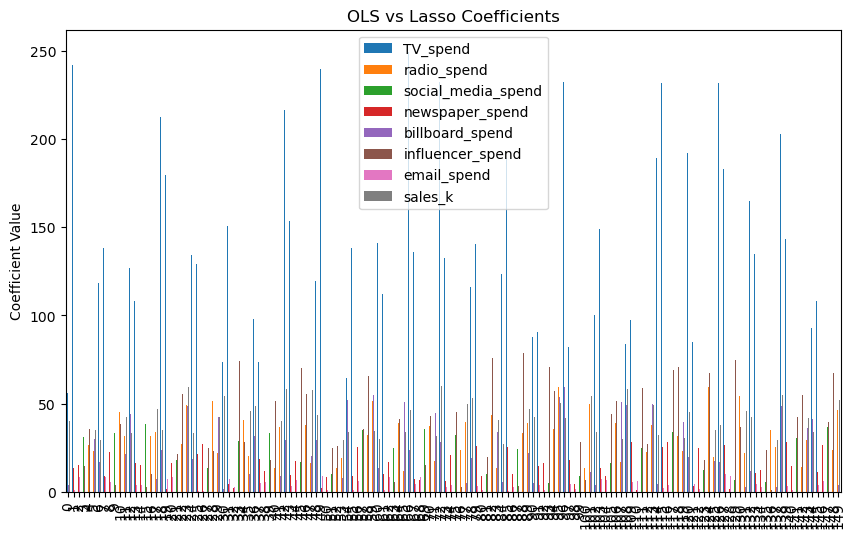

In [8]:
# Plot comparison
coef_df.plot(kind="bar", figsize=(10,6))
plt.axhline(0, color="black", linewidth=0.7)
plt.title("OLS vs Lasso Coefficients")
plt.ylabel("Coefficient Value")
plt.show()